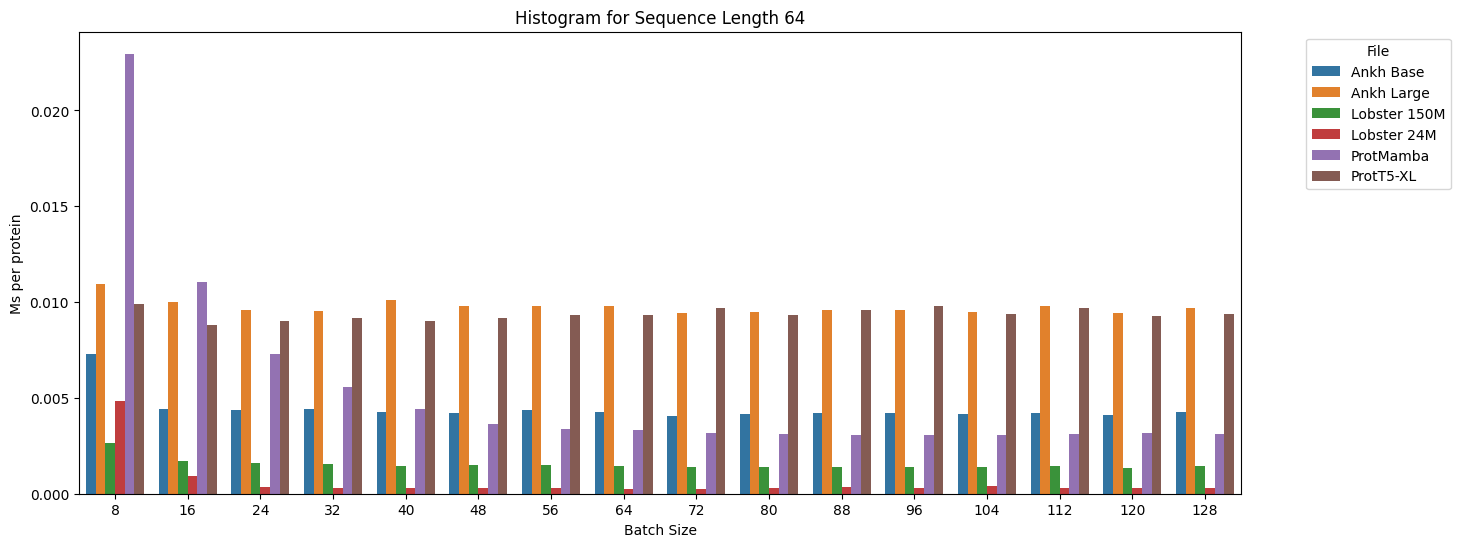

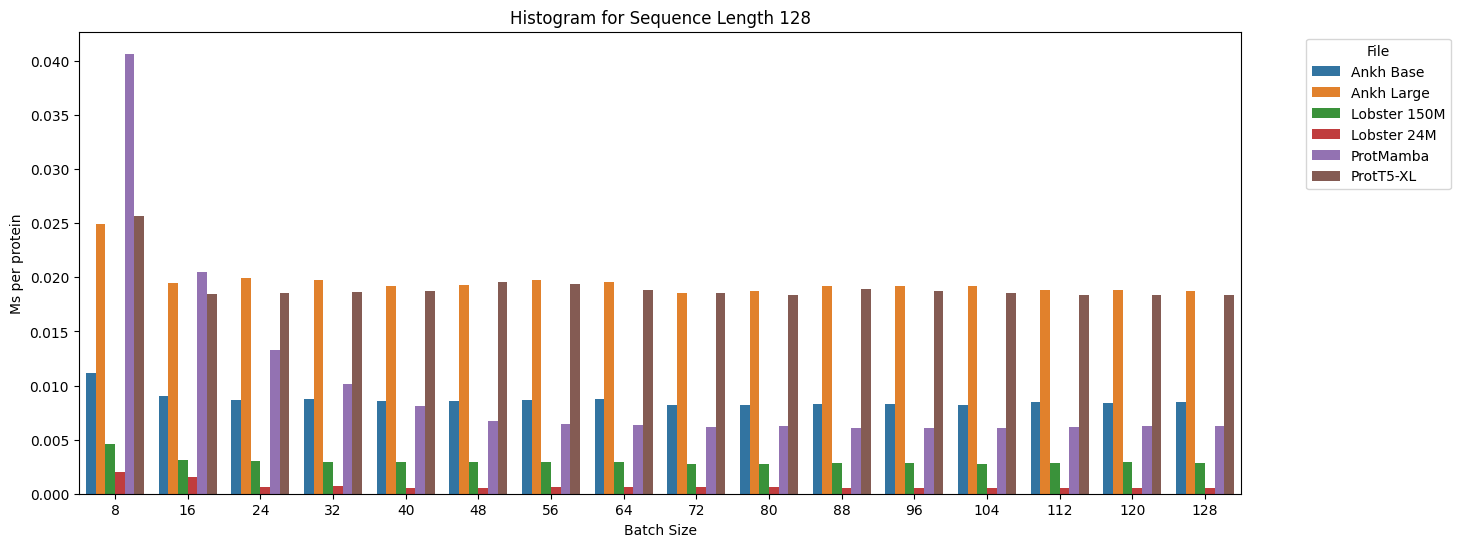

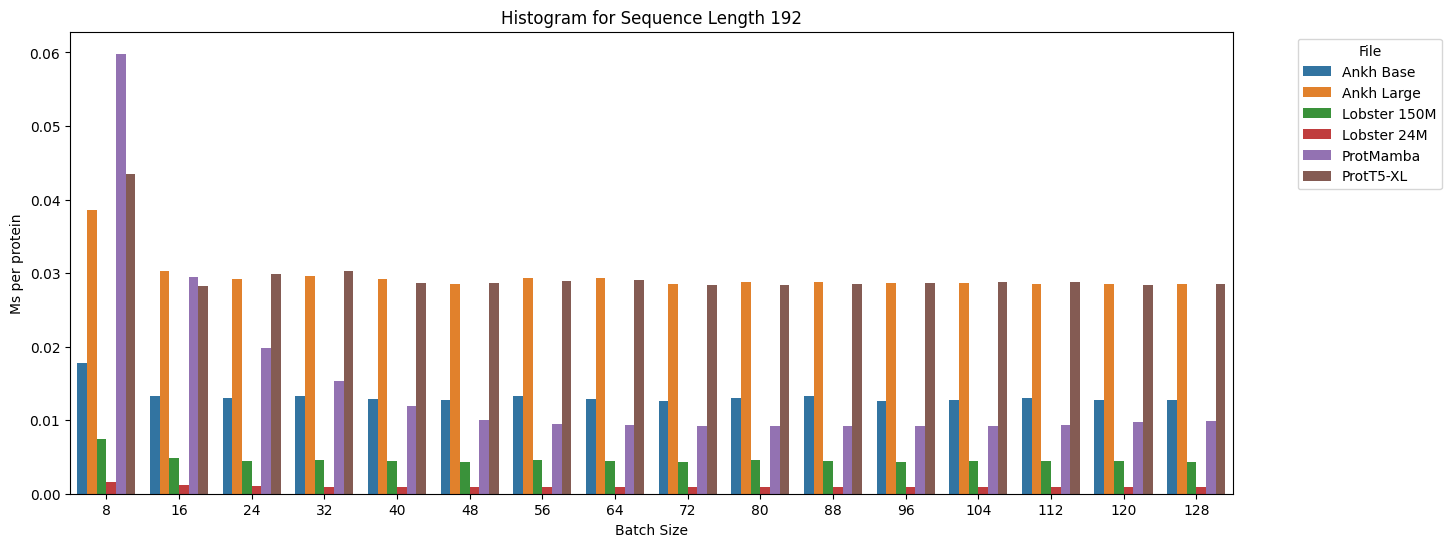

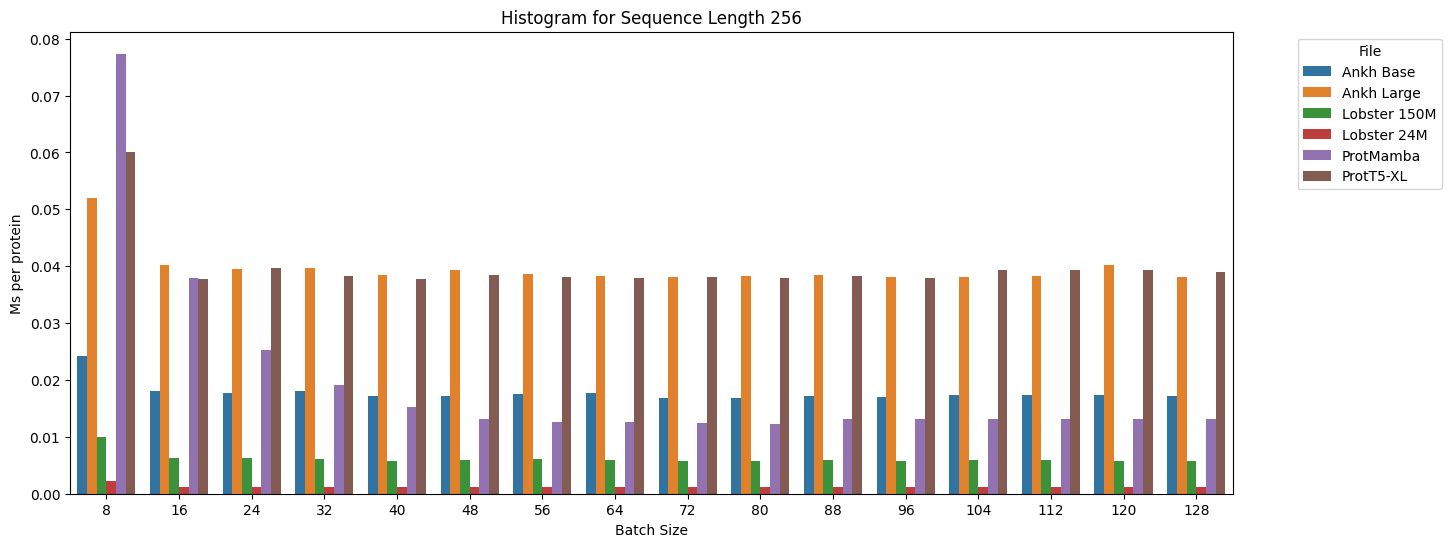

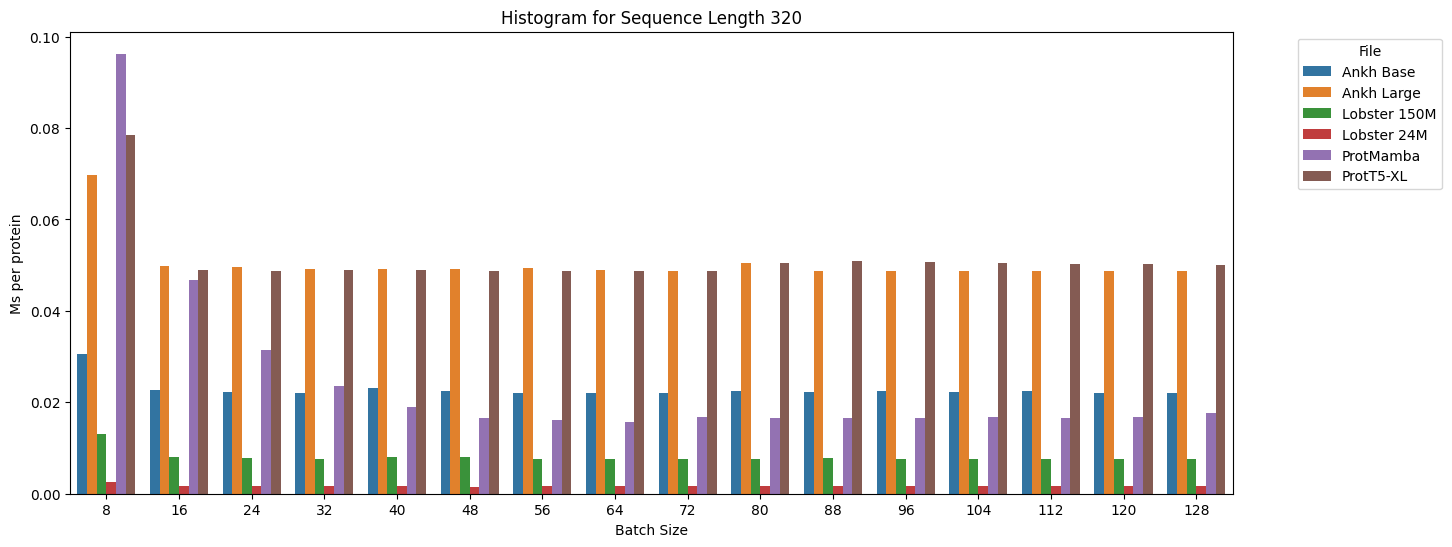

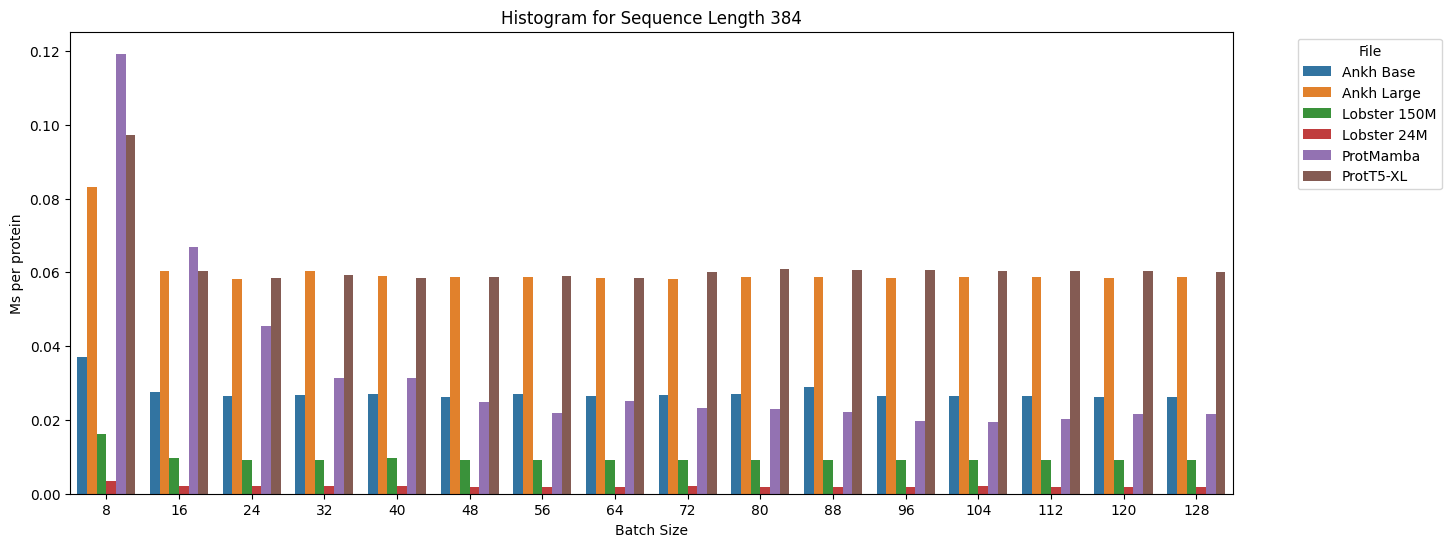

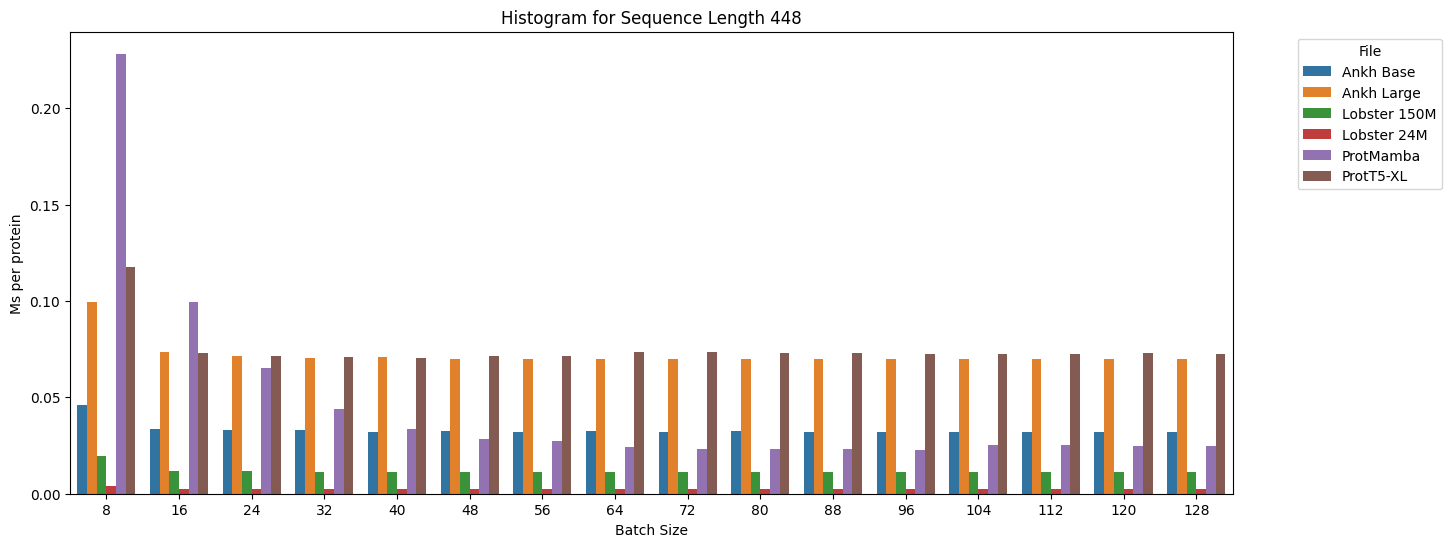

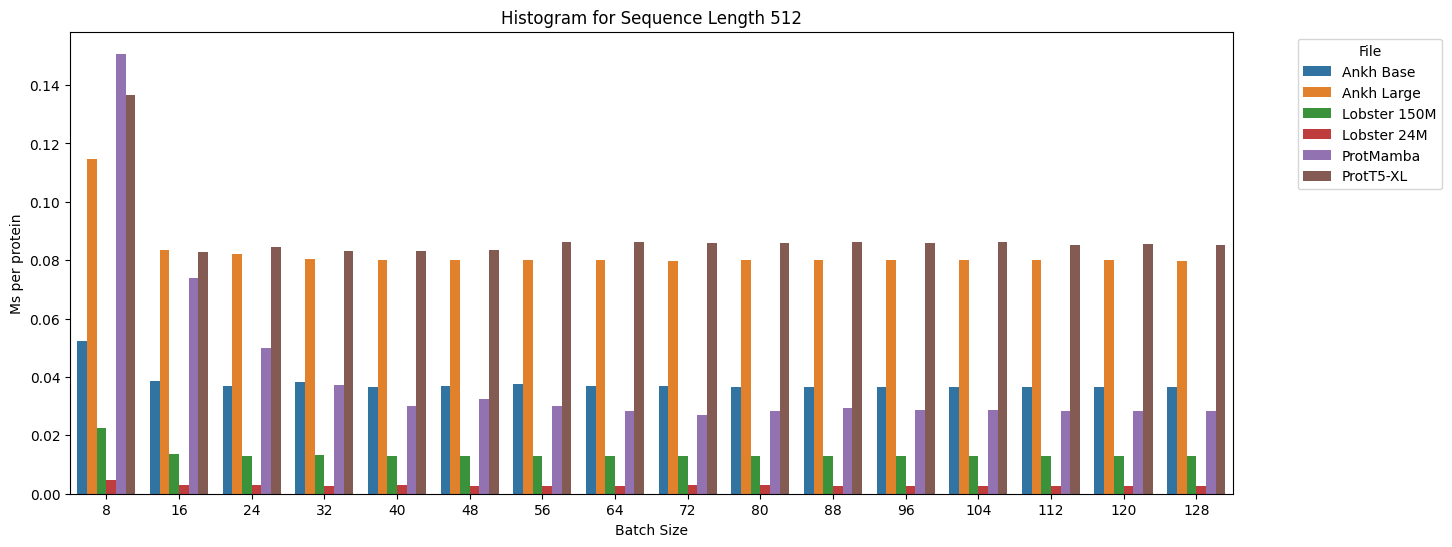

In [7]:

import os
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to load JSON data from a file
def load_json(file_path):
    with open(file_path, 'r') as file:
        return json.load(file)

# Directory containing the JSON files
directory = './results/'

# Load all JSON files in the directory and sort them alphabetically
json_files = sorted([f for f in os.listdir(directory) if f.endswith('.json')])

# Create a DataFrame to hold the data
data_list = []
for f in json_files:
    file_data = load_json(os.path.join(directory, f))
    current_df = None
    current_df = pd.DataFrame(file_data)
    current_df.to_csv(os.path.join(directory, f.replace("json", "csv")))
    for item in file_data:
        data_list.append({
            'File': f[:-13],
            'Batch Size': item['Batch Size'],
            'Ms per protein': item['Ms per protein'],
            'Sequence Length': item['Sequence Length']
        })

df = pd.DataFrame(data_list)

# Create histograms for each sequence length using Seaborn
for seq_len in df['Sequence Length'].unique():
    plt.figure(figsize=(15, 6))
    subset = df[df['Sequence Length'] == seq_len]
    sns.barplot(data=subset, x='Batch Size', y='Ms per protein', hue='File', errorbar=None)
    
    plt.xlabel('Batch Size')
    plt.ylabel('Ms per protein')
    plt.title(f'Histogram for Sequence Length {seq_len}')
    plt.legend(title='File', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()